# Numerical Macroeconomics Tutorial 1

Brian Wang

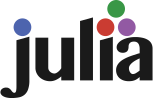

"Julia v1.5.2."

In [1]:
download("https://nextjournal.com/data/QmUCNnw1PVdYnj6eNQdRs6nwkM9V75RKxADqCoUH7WFUUr?filename=Julia_Programming_Language_Logo.svg&content-type=image/svg%2Bxml", "/results/logo.svg")
"Julia v$VERSION."

In [1]:
import Pkg
Pkg.add("Distributions")
Pkg.add("DataFrames")
Pkg.add("GLM")

using LinearAlgebra
using Random
using Statistics
using Plots
using Distributions
using DataFrames
using GLM

* The Julia function to generate n observations from the continuous uniform density, $U[0.0, 1.0]$*,* is rand(n). Using this, write your own function that generates n observations from a U\[a; b\] density.

In [1]:
function my_uniform(lower::T, upper::T,dim... ) where {T<:AbstractFloat}

    if upper >= lower
        data=rand(typeof(lower),dim)
        data=data.*(upper-lower).+lower
        # Julia takes .+ as element-wise calculation
        return data
    else 
        throw(DomainError(-1,"Lower bound is larger than upper bound, try reversing the bounds "))
        return nothing
    end
  
end

my_uniform

This function implements $U[lower, upper]$*,* with a variable number of dimensions. For a working example, please see:

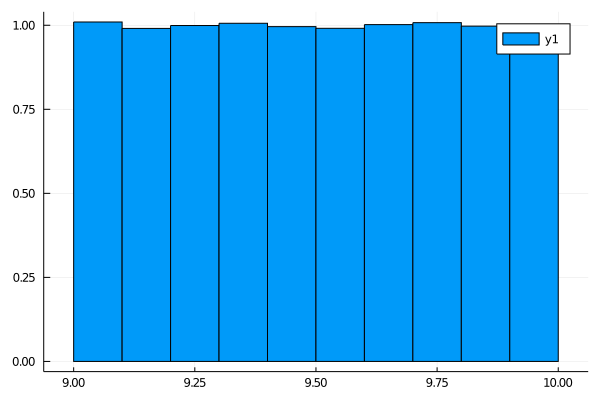

In [1]:
data_U=my_uniform(9.0,10.0,100_000)
plot1=histogram(data_U,bins=10,normalize=true)

* Write a function that generates n observations from the stationary auto-regressive process：

$$
x_{t+1}=\alpha + \rho x_t+\epsilon_{t+1}, \;\;\epsilon_t\sim n.i.i.d. [0,0,\sigma^2]\\
0.0<\rho<1.0 
$$
for an arbitrary initial value, $x_1$. The Julia function for generating n observations from a standard normal density is randn(n). Your function should take $\alpha,\rho,and\;\sigma $ as inputs, along with $x_1$.

In [1]:
function my_data(;α::T=0.0,ρ::T=0.5,σ::T=1.0,x1::T=0.0,n::Int64=10) where {T<:AbstractFloat}
  
    data    = ones(n)
    data[1] = x1
    try
        tan(log(ρ*(1-ρ)))
        # for detecing the errors in domain of ρ 
    
        for i in 2:1:n
            # println(x1)
            ϵ  = σ * randn(1)
            x1 = α + ρ*x1 + ϵ[1]
            global data[i] = x1
        end
        println(data)
        print("data is with size ")
        println(size(data))
 
        return data
    
    catch err
        if ρ == 0
            println("ρ is 0: not allowed")
        elseif ρ == 1
            println("ρ is 1: not allowed")
        else
            println(err)
        end
    
        return err
    end
  
end

my_data

For example, let's generate 1000 observations with $\alpha=0.0, \rho=0.70, \sigma=1.2$ and$x_1=0.0$.  

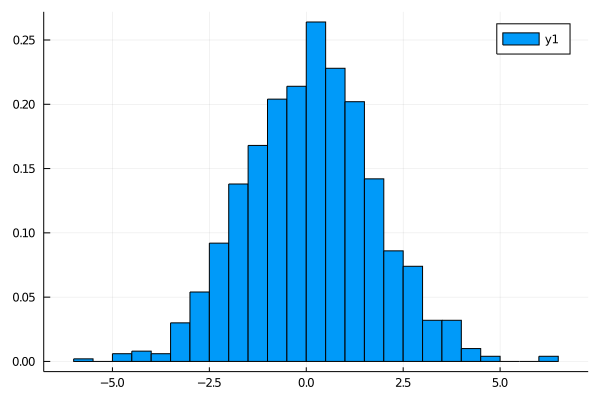

In [1]:
data1=my_data(ρ=0.70,σ=1.2,n=1000)
plot2=histogram(data1, normalize=true)

If we compare it with 1000 observations from $U[0.0,2.0]$

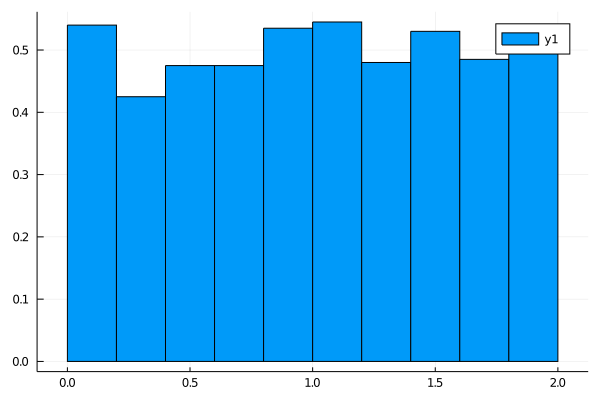

In [1]:
dis2=Uniform(0.0,2.0)
data2=rand(dis2,1000)
plot3=histogram(data2,normalize=true)

* Using the 1000 observations generated above from the autoregressive process, perform ordinary least squares regression to estimate the parameters $\;\alpha\;and\;\rho$

In [1]:
X=data1[1:999]
Y=data1[2:1000]
ols_data1=lm(@formula(Y~1+X),DataFrame(X=X,Y=Y))
println(ols_data1)

estimated=coef(ols_data1)
print("α's estimate is💖  ")
println(estimated[1])
print("ρ's estimate is💖  ")
println(estimated[2])

And we estimate $\;\alpha\;and\;\rho$ with decent accuracy. 